In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 999)

# Reading data

In [2]:
listings = pd.read_csv('data/listings.csv')
calendar = pd.read_csv('data/calendar.csv')
reviews = pd.read_csv('data/reviews.csv')

In [3]:
print(listings.shape)
listings.head()

(7151, 106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190306152813,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,today,t,1,1,2,64,2019-03-06,180,52,2009-07-23,2019-02-17,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.54
1,5858,https://www.airbnb.com/rooms/5858,20190306152813,2019-03-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,80%,NaN,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache

In [10]:
min(listings['last_scraped'])

'2019-03-06'

In [4]:
print(calendar.shape)
calendar.head()

(2610115, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,138619,2019-03-06,f,$160.00,$160.00,30,30
1,958,2019-03-06,f,$158.00,$158.00,1,30
2,958,2019-03-07,f,$158.00,$158.00,1,30
3,958,2019-03-08,f,$156.00,$156.00,1,30
4,958,2019-03-09,f,$154.00,$154.00,1,30


In [5]:
print(reviews.shape)
reviews.head()

(311277, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


# Cleaning data

In [18]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = (
    calendar
    .loc[:, 'price']
    .str.extract(r'\$(.*)', expand=False)
    .str.replace(r',', '')
    .astype(np.float_)
)

In [61]:
means = calendar.groupby('listing_id').mean()['price']
final = pd.merge(calendar, means.to_frame(), left_on='listing_id', right_index=True)

In [70]:
final['outlier'] = ((final['price_x'] - final['price_y']) > 500) | ((final['price_x'] - final['price_y']) < -500)

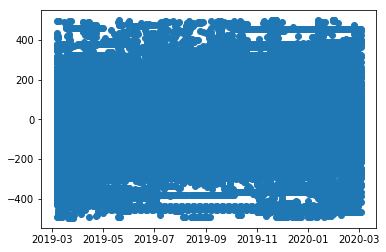

In [74]:
plt.plot_date(final[~final['outlier']]['date'], final[~final['outlier']]['price_x'] - final[~final['outlier']]['price_y'])

In [77]:
diffs = final[['listing_id', 'price_x']].groupby('listing_id').diff()

In [78]:
diffs['listing_id'] = final['listing_id']
diffs['date'] = final['date']

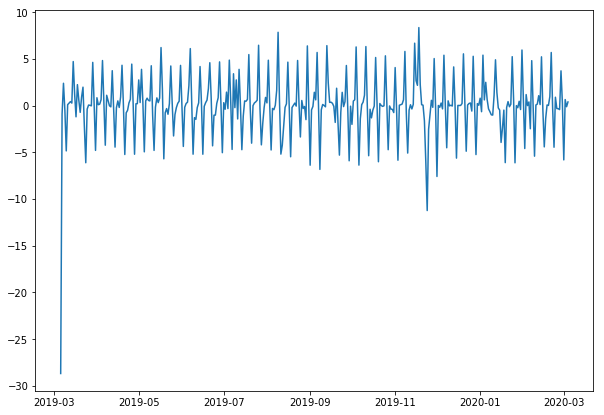

In [113]:
plt.figure(figsize=(10, 7))
plt.plot(diffs.groupby('date').mean()['price_x'])

In [131]:
diffs_means = diffs.groupby('date').mean()

In [132]:
# AVERAGE DAY-BY-DAY
# 0 = Monday, 6 = Sunday
diffs_means['day'] = diffs_means.index.dayofweek
diffs_means.groupby('day').median()

,price_x,listing_id,count
day,,,
0,-0.019997,1.666813e+07,7151
1,0.023006,1.666813e+07,7151
2,0.165571,1.666813e+07,7151
3,0.170836,1.666813e+07,7151
4,4.828659,1.666813e+07,7151
5,0.063144,1.666813e+07,7151
6,-4.994056,1.666813e+07,7151


In [133]:
# PRIDE: Saturday 6/29 - Sunday 6/30
# Expected rise in prices: Friday 6/28
diffs_means.loc['2019-6-25':'2019-7-3']

,price_x,listing_id,count,day
date,,,,
2019-06-25,-1.015247,1.666813e+07,7151,1
2019-06-26,0.237589,1.666813e+07,7151,2
2019-06-27,0.840957,1.666813e+07,7151,3
2019-06-28,4.681678,1.666813e+07,7151,4
2019-06-29,0.147811,1.666813e+07,7151,5
2019-06-30,-5.039301,1.666813e+07,7151,6
2019-07-01,0.312867,1.666813e+07,7151,0
2019-07-02,-0.391833,1.666813e+07,7151,1
2019-07-03,1.443574,1.666813e+07,7151,2


In [134]:
# 4TH OF JULY: Thursday 7/4 - Sunday 7/7
# Expected rise in prices: Wednesday 7/3
diffs_means.loc['2019-7-1':'2019-7-9']

,price_x,listing_id,count,day
date,,,,
2019-07-01,0.312867,1.666813e+07,7151,0
2019-07-02,-0.391833,1.666813e+07,7151,1
2019-07-03,1.443574,1.666813e+07,7151,2
2019-07-04,-0.319110,1.666813e+07,7151,3
2019-07-05,4.870769,1.666813e+07,7151,4
2019-07-06,0.519508,1.666813e+07,7151,5
2019-07-07,-4.690812,1.666813e+07,7151,6
2019-07-08,3.409873,1.666813e+07,7151,0
2019-07-09,-0.214935,1.666813e+07,7151,1


In [135]:
# DREAMFORCE: Tuesday 11/19 - Friday 11/22
# Expected rise in prices: Friday 11/15
diffs_means.loc['2019-11-10':'2019-11-29']

,price_x,listing_id,count,day
date,,,,
2019-11-10,-5.080548,1.666813e+07,7151,6
2019-11-11,-0.484548,1.666813e+07,7151,0
2019-11-12,0.091316,1.666813e+07,7151,1
2019-11-13,-0.357722,1.666813e+07,7151,2
2019-11-14,0.133287,1.666813e+07,7151,3
2019-11-15,6.683916,1.666813e+07,7151,4
2019-11-16,2.680045,1.666813e+07,7151,5
2019-11-17,2.172563,1.666813e+07,7151,6
2019-11-18,8.354776,1.666813e+07,7151,0


In [136]:
# CHRISTMAS: Wednesday 12/25
diffs_means.loc['2019-12-20':'2019-12-30']

,price_x,listing_id,count,day
date,,,,
2019-12-20,5.542581,1.666813e+07,7151,4
2019-12-21,0.429091,1.666813e+07,7151,5
2019-12-22,-4.882814,1.666813e+07,7151,6
2019-12-23,0.063068,1.666813e+07,7151,0
2019-12-24,0.230317,1.666813e+07,7151,1
2019-12-25,0.283676,1.666813e+07,7151,2
2019-12-26,-0.583555,1.666813e+07,7151,3
2019-12-27,5.279720,1.666813e+07,7151,4
2019-12-28,0.013287,1.666813e+07,7151,5


In [140]:
# NEW YEARS: Wednesday 1/1
diffs_means.loc['2019-12-28':'2020-1-07']

,price_x,listing_id,count,day
date,,,,
2019-12-28,0.013287,1.666813e+07,7151,5
2019-12-29,-5.241085,1.666813e+07,7151,6
2019-12-30,0.212698,1.666813e+07,7151,0
2019-12-31,0.040559,1.666813e+07,7151,1
2020-01-01,0.793875,1.666813e+07,7151,2
2020-01-02,-0.651377,1.666813e+07,7151,3
2020-01-03,5.402910,1.666813e+07,7151,4
2020-01-04,0.610210,1.666813e+07,7151,5
2020-01-05,2.493078,1.666813e+07,7151,6


In [139]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,138619,2019-03-06,f,160.0,$160.00,30,30
1,958,2019-03-06,f,158.0,$158.00,1,30
2,958,2019-03-07,f,158.0,$158.00,1,30
3,958,2019-03-08,f,156.0,$156.00,1,30
4,958,2019-03-09,f,154.0,$154.00,1,30
5,958,2019-03-10,f,153.0,$153.00,1,30
6,958,2019-03-11,f,154.0,$154.00,1,30
7,958,2019-03-12,f,155.0,$155.00,1,30
8,958,2019-03-13,f,156.0,$156.00,1,30
9,958,2019-03-14,f,156.0,$156.00,1,30
